Dataset : https://www.kaggle.com/eswarchandt/phishing-website-detector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
data.shape

(11054, 32)

In [4]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
data = data.drop(['Index'],axis = 1)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
PageRank,11054.0,-0.483626,0.875314,-1.0,-1.0,-1.0,1.0,1.0
GoogleIndex,11054.0,0.721549,0.692395,-1.0,1.0,1.0,1.0,1.0
LinksPointingToPage,11054.0,0.343948,0.569936,-1.0,0.0,0.0,1.0,1.0
StatsReport,11054.0,0.719739,0.694276,-1.0,1.0,1.0,1.0,1.0


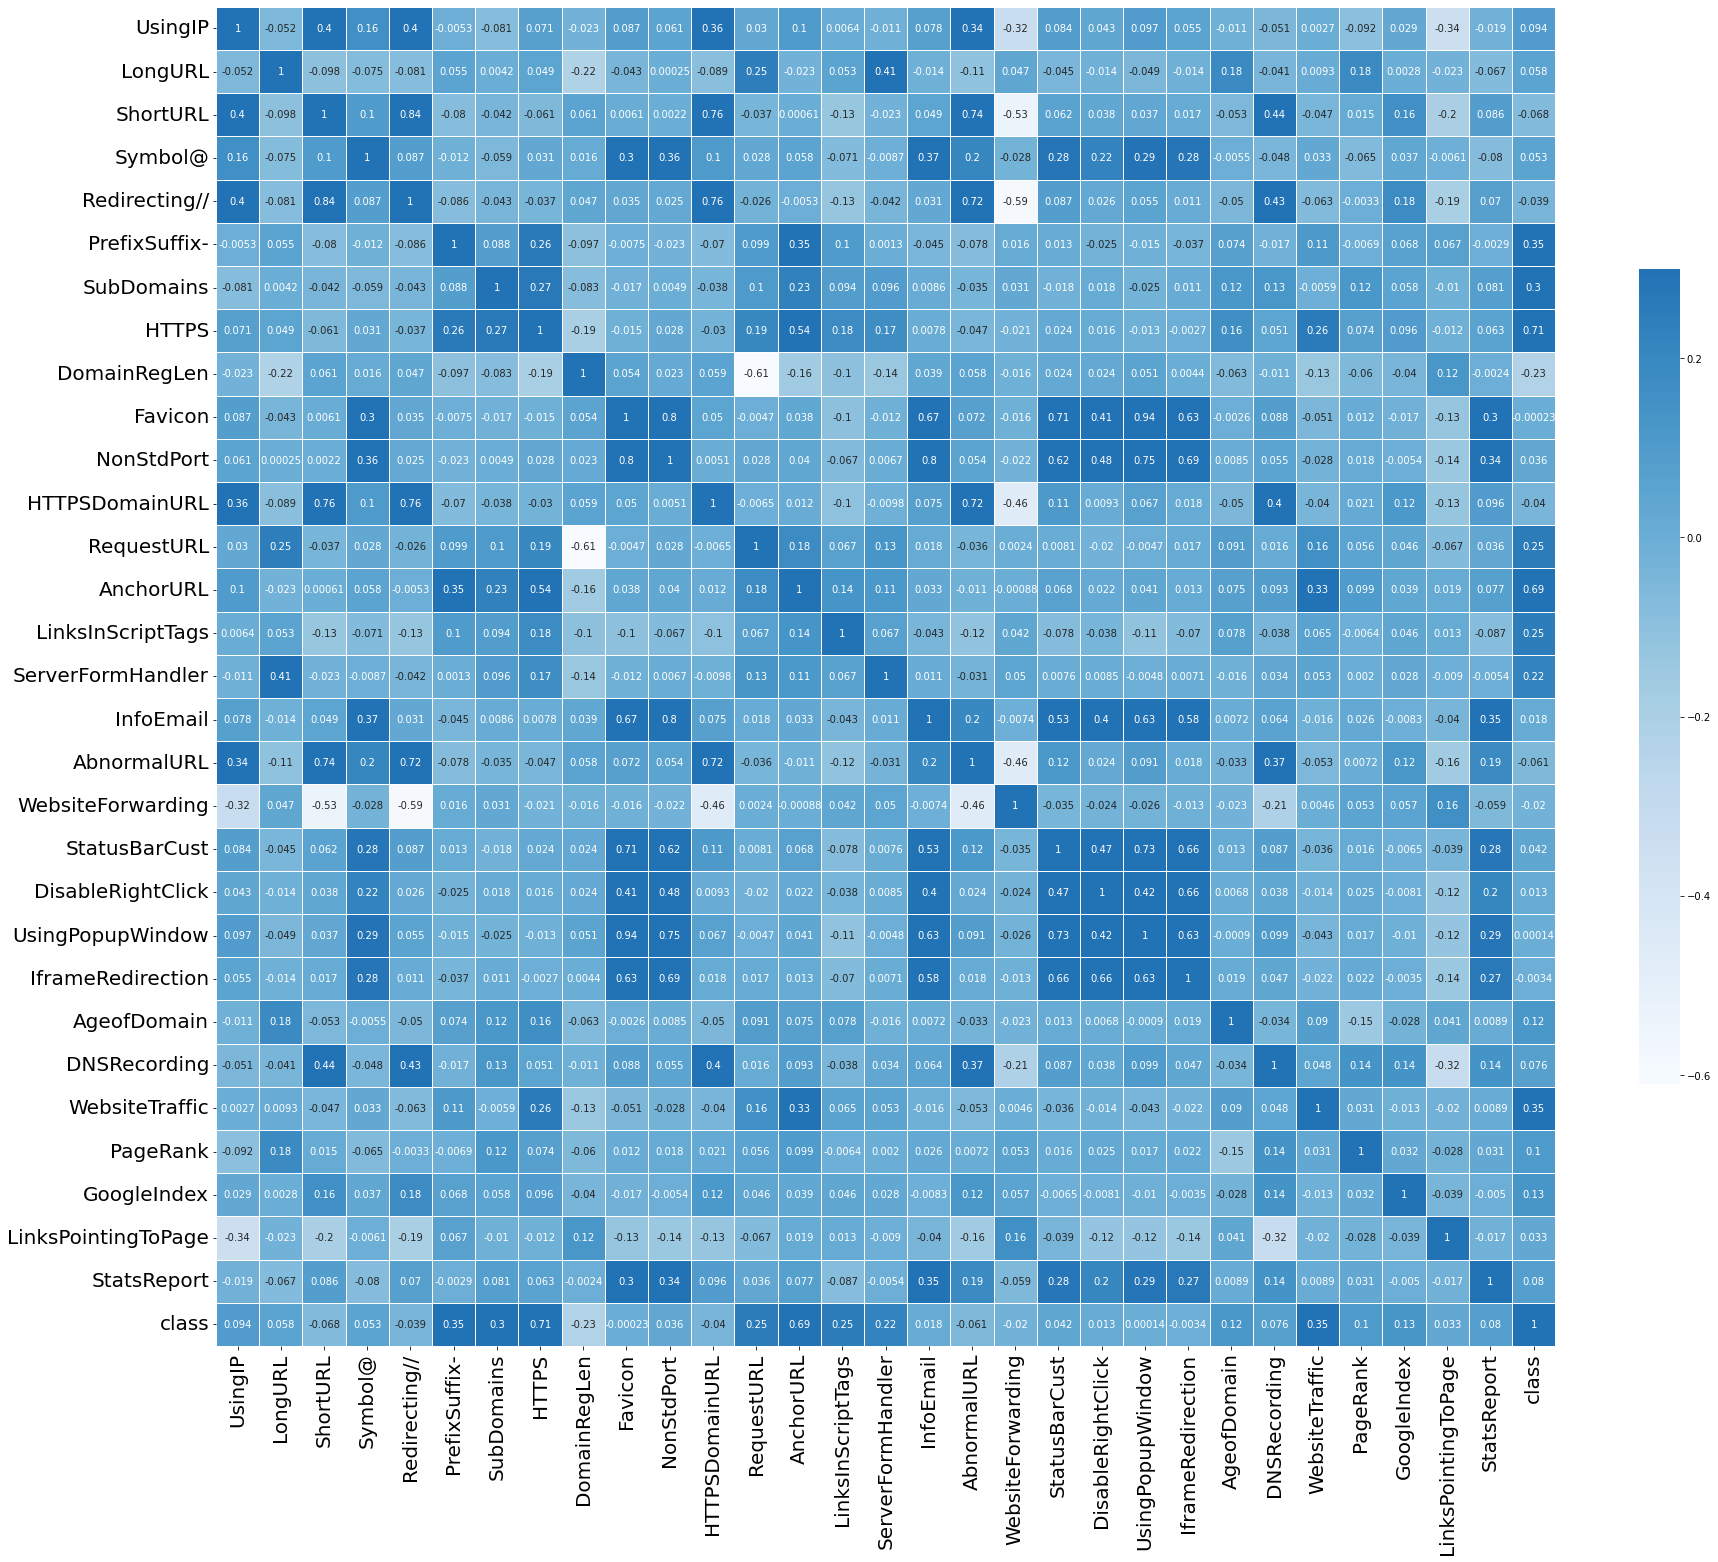

In [9]:
f, ax = plt.subplots(figsize=(30, 30))

cmap = sns.color_palette("Blues", as_cmap=True)
heatmap = sns.heatmap(data.corr(), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.show()

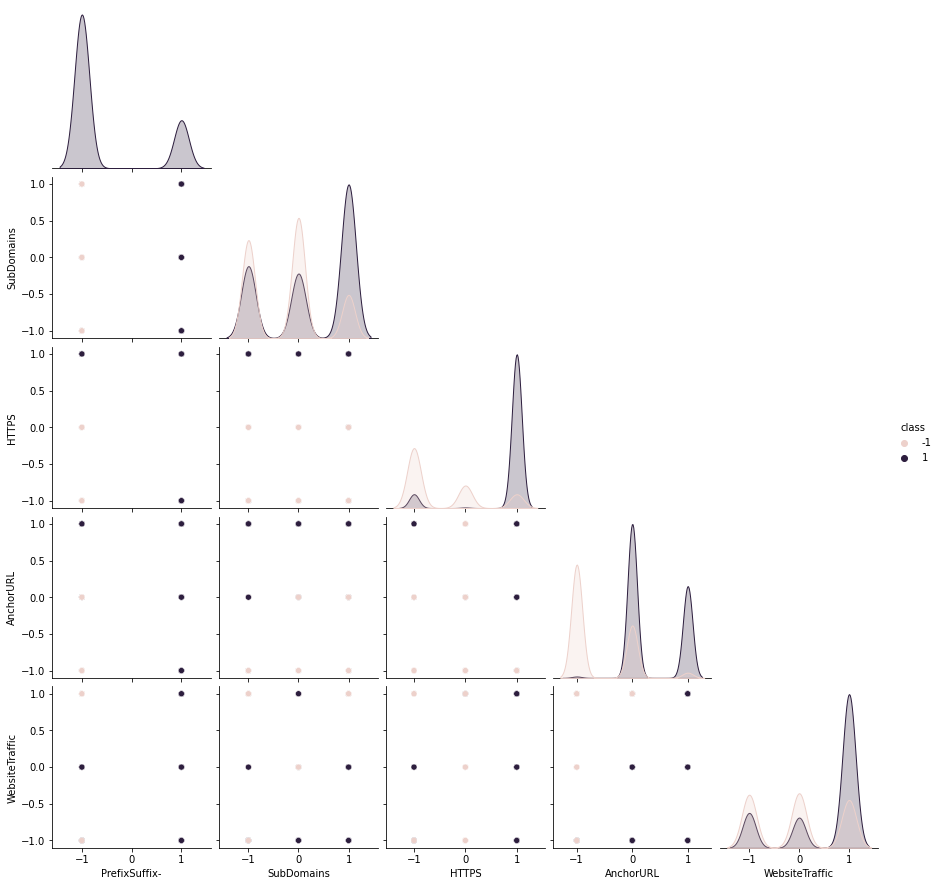

In [10]:
df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


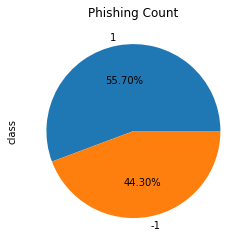

In [11]:
data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [60]:
X = data.drop(["class"],axis =1)
y = data["class"]

In [61]:
y.unique()

array([-1,  1])

In [62]:
y = (y+1)/2

In [63]:
y.value_counts()

1.0    6157
0.0    4897
Name: class, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

In [66]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [67]:
X_train_resampled.shape, y_train_resampled.shape,

((9844, 30), (9844,))

## 5. Model Building & Training:

The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [68]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []


def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [123]:
y_train_log = log.predict(X_train_resampled)
y_test_log = log.predict(X_test)

In [124]:
acc_train_log = metrics.accuracy_score(y_train_resampled,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train_resampled,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train_resampled,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train_resampled,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.924
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.925
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.933
Logistic Regression : Recall on test Data: 0.943

Logistic Regression : precision on training Data: 0.917
Logistic Regression : precision on test Data: 0.939


In [125]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       976
         1.0       0.94      0.94      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [126]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.5. Decision Trees : Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)
 
tree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=30)

In [128]:
y_train_tree = tree.predict(X_train_resampled)
y_test_tree = tree.predict(X_test)

In [129]:
acc_train_tree = metrics.accuracy_score(y_train_resampled,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train_resampled,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train_resampled,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train_resampled,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.960

Decision Tree : f1_score on training Data: 0.991
Decision Tree : f1_score on test Data: 0.964

Decision Tree : Recall on training Data: 0.990
Decision Tree : Recall on test Data: 0.960

Decision Tree : precision on training Data: 0.992
Decision Tree : precision on test Data: 0.968


In [130]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       976
         1.0       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



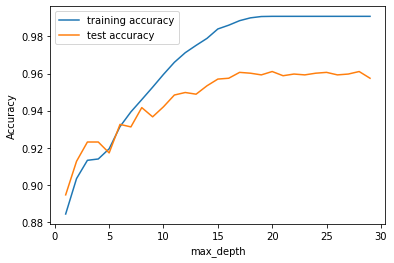

In [131]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [132]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
 
forest.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(n_estimators=10)

In [134]:
y_train_forest = forest.predict(X_train_resampled)
y_test_forest = forest.predict(X_test)

In [135]:
acc_train_forest = metrics.accuracy_score(y_train_resampled,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train_resampled,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train_resampled,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train_resampled,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.990
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.990
Random Forest : f1_score on test Data: 0.971

Random Forest : Recall on training Data: 0.989
Random Forest : Recall on test Data: 0.971

Random Forest : precision on training Data: 0.991
Random Forest : precision on test Data: 0.968


In [136]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       976
         1.0       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



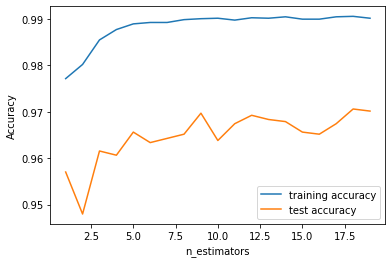

In [137]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [138]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

gbc.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [141]:
y_train_gbc = gbc.predict(X_train_resampled)
y_test_gbc = gbc.predict(X_test)

In [142]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train_resampled,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train_resampled,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train_resampled,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train_resampled,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.987
Gradient Boosting Classifier : Accuracy on test Data: 0.970

Gradient Boosting Classifier : f1_score on training Data: 0.987
Gradient Boosting Classifier : f1_score on test Data: 0.973

Gradient Boosting Classifier : Recall on training Data: 0.987
Gradient Boosting Classifier : Recall on test Data: 0.979

Gradient Boosting Classifier : precision on training Data: 0.987
Gradient Boosting Classifier : precision on test Data: 0.968


In [143]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       976
         1.0       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



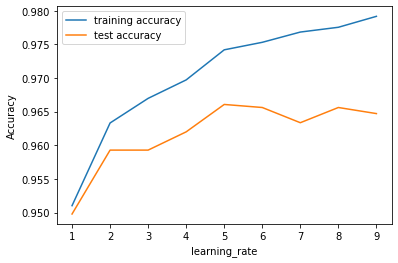

In [144]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

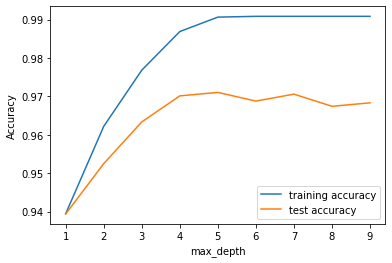

In [145]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train_resampled, y_train_resampled)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train_resampled, y_train_resampled))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [146]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [147]:

from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train_resampled,y_train_resampled)

0:	learn: 0.5446689	total: 4.2ms	remaining: 4.2s
1:	learn: 0.4294952	total: 10.2ms	remaining: 5.09s
2:	learn: 0.3685612	total: 16.3ms	remaining: 5.4s
3:	learn: 0.3130715	total: 21.9ms	remaining: 5.45s
4:	learn: 0.2746897	total: 27.6ms	remaining: 5.49s
5:	learn: 0.2481382	total: 34.2ms	remaining: 5.67s
6:	learn: 0.2335740	total: 40.3ms	remaining: 5.71s
7:	learn: 0.2167167	total: 46.7ms	remaining: 5.79s
8:	learn: 0.2017855	total: 52.5ms	remaining: 5.78s
9:	learn: 0.1912278	total: 62ms	remaining: 6.14s
10:	learn: 0.1833917	total: 68.7ms	remaining: 6.18s
11:	learn: 0.1783403	total: 75.6ms	remaining: 6.22s
12:	learn: 0.1743700	total: 81.6ms	remaining: 6.19s
13:	learn: 0.1686451	total: 87.6ms	remaining: 6.17s
14:	learn: 0.1638693	total: 93.4ms	remaining: 6.13s
15:	learn: 0.1596958	total: 99.2ms	remaining: 6.1s
16:	learn: 0.1562906	total: 105ms	remaining: 6.06s
17:	learn: 0.1527260	total: 111ms	remaining: 6.03s
18:	learn: 0.1497433	total: 117ms	remaining: 6.04s
19:	learn: 0.1473437	total: 123

In [106]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [107]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [108]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       976
         1.0       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [109]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 4.71ms	remaining: 4.71s
1:	learn: 0.4349357	total: 11.1ms	remaining: 5.54s
2:	learn: 0.3609236	total: 16.7ms	remaining: 5.56s
3:	learn: 0.3050829	total: 24.6ms	remaining: 6.13s
4:	learn: 0.2766620	total: 30.8ms	remaining: 6.12s
5:	learn: 0.2475476	total: 36.9ms	remaining: 6.11s
6:	learn: 0.2286637	total: 42.5ms	remaining: 6.03s
7:	learn: 0.2138754	total: 47.9ms	remaining: 5.95s
8:	learn: 0.2013643	total: 53.4ms	remaining: 5.88s
9:	learn: 0.1896378	total: 59ms	remaining: 5.84s
10:	learn: 0.1819539	total: 64.4ms	remaining: 5.79s
11:	learn: 0.1767867	total: 69.7ms	remaining: 5.74s
12:	learn: 0.1727735	total: 75.1ms	remaining: 5.7s
13:	learn: 0.1682578	total: 80.3ms	remaining: 5.66s
14:	learn: 0.1641759	total: 85.8ms	remaining: 5.63s
15:	learn: 0.1614218	total: 91.3ms	remaining: 5.61s
16:	learn: 0.1558968	total: 96.6ms	remaining: 5.59s
17:	learn: 0.1535881	total: 102ms	remaining: 5.57s
18:	learn: 0.1514228	total: 108ms	remaining: 5.56s
19:	learn: 0.1482580	total:

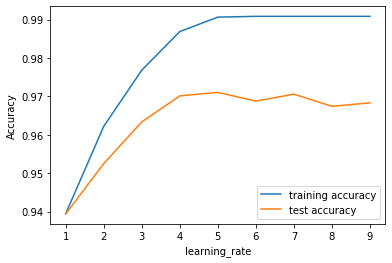

In [148]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [149]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier
 
###### XGBoost is all you Need !

In [150]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [151]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train_resampled)
y_test_xgb = xgb.predict(X_test)

In [152]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train_resampled,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train_resampled,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train_resampled,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train_resampled,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.987
XGBoost Classifier : Accuracy on test Data: 0.970

XGBoost Classifier : f1_score on training Data: 0.987
XGBoost Classifier : f1_score on test Data: 0.973

XGBoost Classifier : Recall on training Data: 0.988
XGBoost Classifier : Recall on test Data: 0.988

XGBoost Classifier : precision on training Data: 0.987
XGBoost Classifier : precision on test Data: 0.987


In [153]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

# Quantum Decision Trees (qtrees)

In [116]:
from qtree.qtree import QTree
qtree = QTree(max_depth=1)

In [155]:
y_train_resampled

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
9839    0.0
9840    0.0
9841    0.0
9842    0.0
9843    0.0
Name: class, Length: 9844, dtype: float64

In [158]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9844 entries, 0 to 9843
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   UsingIP              9844 non-null   int64
 1   LongURL              9844 non-null   int64
 2   ShortURL             9844 non-null   int64
 3   Symbol@              9844 non-null   int64
 4   Redirecting//        9844 non-null   int64
 5   PrefixSuffix-        9844 non-null   int64
 6   SubDomains           9844 non-null   int64
 7   HTTPS                9844 non-null   int64
 8   DomainRegLen         9844 non-null   int64
 9   Favicon              9844 non-null   int64
 10  NonStdPort           9844 non-null   int64
 11  HTTPSDomainURL       9844 non-null   int64
 12  RequestURL           9844 non-null   int64
 13  AnchorURL            9844 non-null   int64
 14  LinksInScriptTags    9844 non-null   int64
 15  ServerFormHandler    9844 non-null   int64
 16  InfoEmail            984

In [154]:
qtree.fit(X_train_resampled,y_train_resampled)

IndexError: tuple index out of range

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [161]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [162]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,Decision Tree,0.959,0.963,0.991,0.993
2,Random Forest,0.963,0.967,0.991,0.992
3,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
4,XGBoost Classifier,0.969,0.973,0.993,0.984
...,...,...,...,...,...
8,Decision Tree,0.960,0.964,0.990,0.992
9,Random Forest,0.967,0.971,0.989,0.991
10,Gradient Boosting Classifier,0.970,0.973,0.987,0.987
11,CatBoost Classifier,0.972,0.975,0.994,0.989


In [163]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [164]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,CatBoost Classifier,0.972,0.975,0.994,0.989
3,Gradient Boosting Classifier,0.970,0.973,0.987,0.987
4,XGBoost Classifier,0.970,0.973,0.988,0.987
...,...,...,...,...,...
8,Decision Tree,0.960,0.964,0.990,0.992
9,Decision Tree,0.959,0.963,0.991,0.993
10,Logistic Regression,0.934,0.941,0.943,0.927
11,Logistic Regression,0.934,0.941,0.943,0.911


## Storing Best Model

In [104]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
import pickle

# dump information to that file
# pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()